Code that reads in an audio clip and background file, makes it into a 5 second clip, and pushes it through a saved model.

In [7]:
import keras
from pydub import AudioSegment
from mb_utils import *

from datetime import datetime

#import pyaudio
import wave

In [3]:
%matplotlib inline

In [4]:
from importlib import reload
import mb_utils

In [91]:
reload(mb_utils)
from mb_utils import *

### initialization: load trained model

In [6]:
model = keras.models.load_model('trained_models/4109505.h5')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## read file and predict

In [110]:
audio_file = 'recorded_clips/empties/05.wav'
background_filepath = 'recorded_clips/fullbackgrounds_trimmed_5sec/04.wav'

In [111]:
# trims/pads to 5 sec and saves to runtime_temp.wav
preprocess_runtime_clip(audio_file, background_filepath=background_filepath)

   prediction: empty.   [1.0000, 0.0000, 0.0000]


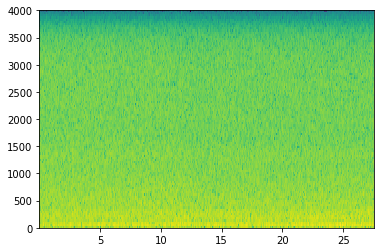

In [112]:
# feed current clip to model and get prediction
pred, preds = run_model_on_clip(model, 'runtime_temp.wav')
preds_nice = ', '.join(['{:.4f}'.format(p) for p in preds[0]])
print('   prediction: {}.   [{}]'.format(pred, preds_nice))